In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Task 1: Data Preparation

Training set: (17040, 784), Labels: (17040, 10)
Testing set: (3000, 784), Labels: (3000, 10)


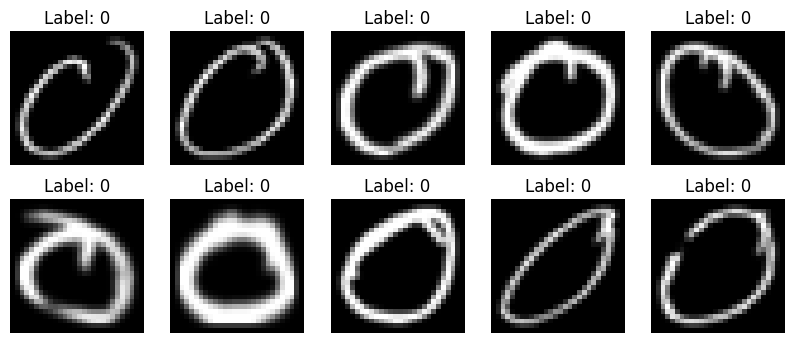

In [ ]:
import os
import numpy as np
from tensorflow.keras.utils import to_categorical
from PIL import Image

# Define dataset paths
train_dir = "/content/drive/MyDrive/DevanagariHandwrittenDigitDataset/Train"
test_dir = "/content/drive/MyDrive/DevanagariHandwrittenDigitDataset/Test"

# Define image size
img_height, img_width = 28, 28

# Function to load images and labels using PIL
def load_images_from_folder(folder):
    images = []
    labels = []

    # Get sorted class names (e.g., digit_0, digit_1, ..., digit_9)
    class_names = sorted(os.listdir(folder))
    class_map = {name: i for i, name in enumerate(class_names)}  # Map class names to labels

    for class_name in class_names:
        class_path = os.path.join(folder, class_name)
        label = class_map[class_name]

        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)

            # Load image using PIL
            img = Image.open(img_path).convert("L")  # Convert to grayscale
            img = img.resize((img_width, img_height))  # Resize to (28, 28)
            img = np.array(img) / 255.0  # Normalize pixel values to [0, 1]

            images.append(img)
            labels.append(label)

    return np.array(images), np.array(labels)

# Load training and testing datasets
x_train, y_train = load_images_from_folder(train_dir)
x_test, y_test = load_images_from_folder(test_dir)

# Flatten images for Keras input
x_train = x_train.reshape(-1, img_height * img_width)  # Shape: (num_samples, 784)
x_test = x_test.reshape(-1, img_height * img_width)

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Print dataset shapes for verification
print(f"Training set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Testing set: {x_test.shape}, Labels: {y_test.shape}")

# Visualize some images
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis("off")
plt.show()

Task 2: Build the FCN Model

In [ ]:
from tensorflow.keras import models, layers

# Create a Sequential model
model = models.Sequential([
    layers.Input(shape=(img_height * img_width,)),  # Input layer (flattened image)
    layers.Dense(64, activation="sigmoid"),         # 1st hidden layer
    layers.Dense(128, activation="sigmoid"),        # 2nd hidden layer
    layers.Dense(256, activation="sigmoid"),        # 3rd hidden layer
    layers.Dense(10, activation="softmax")          # Output layer (10 classes)
])

# Print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

Task 3: Compile the Model

In [ ]:
# Compile the model
model.compile(
    optimizer="adam",  # Optimizer
    loss="categorical_crossentropy",  # Loss function for multi-class classification
    metrics=["accuracy"]  # Evaluation metric
)

Task 4: Train the Model

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define callbacks
callbacks = [
    ModelCheckpoint(filepath="my_model.keras", save_best_only=True),
    EarlyStopping(monitor="val_loss", patience=4)
]

# Train the model
history = model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=500,
    validation_split=0.2,
    callbacks=callbacks
)

Epoch 1/500
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9857 - loss: 0.0518 - val_accuracy: 0.0023 - val_loss: 16.1936
Epoch 2/500
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9926 - loss: 0.0346 - val_accuracy: 0.0023 - val_loss: 16.4000
Epoch 3/500
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9925 - loss: 0.0341 - val_accuracy: 0.0023 - val_loss: 16.7773
Epoch 4/500
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9944 - loss: 0.0248 - val_accuracy: 0.0023 - val_loss: 17.0040
Epoch 5/500
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9950 - loss: 0.0218 - val_accuracy: 0.0023 - val_loss: 17.1836


Task 5: Evaluate the Model


In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

94/94 - 0s - 2ms/step - accuracy: 0.7803 - loss: 3.4954
Test accuracy: 0.7803


Task 6: Save and Load the Model


In [ ]:
# Import TensorFlow
import tensorflow as tf

# Save the trained model in the native Keras format (.keras)
model.save("devnagari_fcn_model.keras")

# Load the saved model
loaded_model = tf.keras.models.load_model("devnagari_fcn_model.keras")

# Re-evaluate the loaded model on the test set
loaded_test_loss, loaded_test_acc = loaded_model.evaluate(x_test, y_test, verbose=2)
print(f"Loaded model test accuracy: {loaded_test_acc:.4f}")

94/94 - 1s - 6ms/step - accuracy: 0.7803 - loss: 3.4954
Loaded model test accuracy: 0.7803


Task 7: Predictions

In [ ]:
# Make predictions on test data
predictions = loaded_model.predict(x_test)

# Convert predictions from probabilities to digit labels
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Display the first prediction
print(f"Predicted label for first image: {predicted_labels[0]}")
print(f"True label for first image: {true_labels[0]}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Predicted label for first image: 0
True label for first image: 0


Visualization


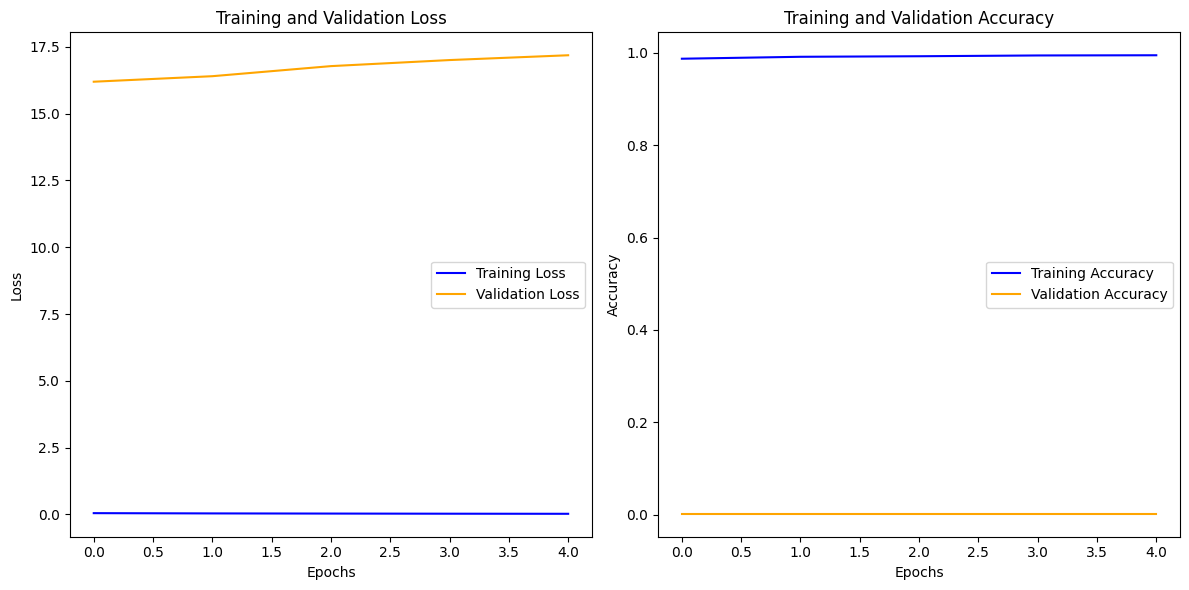

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()